In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the dataset
df = 'advertising.csv' 
data = pd.read_csv(df)

In [33]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [34]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [35]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [36]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

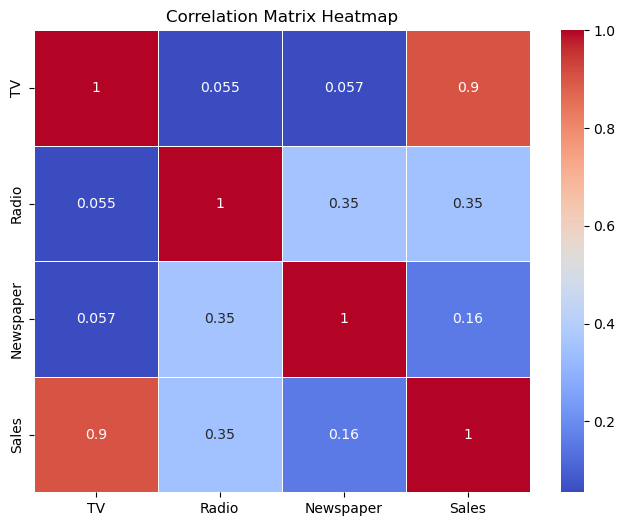

In [38]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

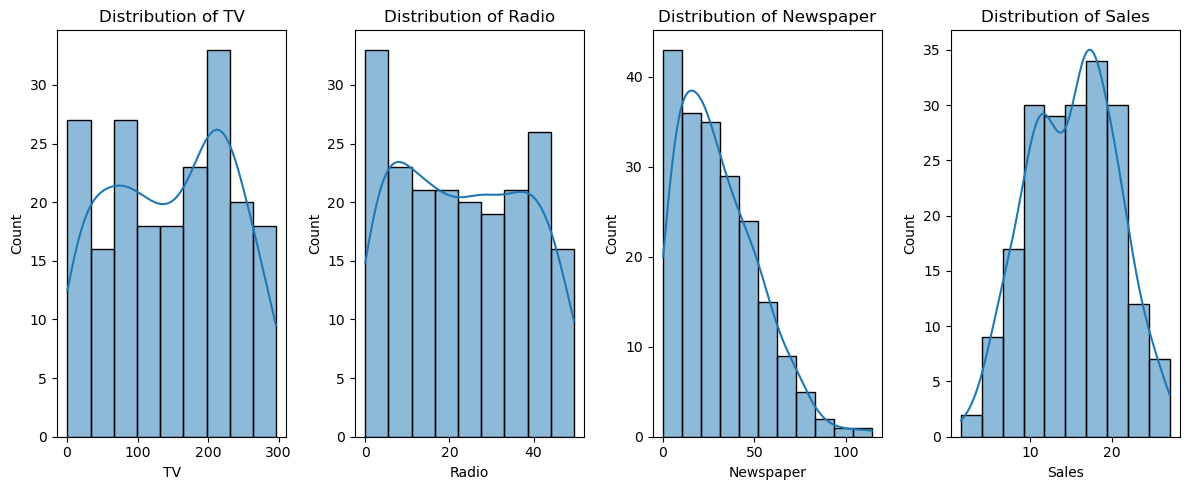

In [39]:
# Distribution plots
plt.figure(figsize=(12, 5))
for i, col in enumerate(data.columns, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [40]:
# Split the dataset into features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

Mean Squared Error: 2.91
R2 Score: 0.91


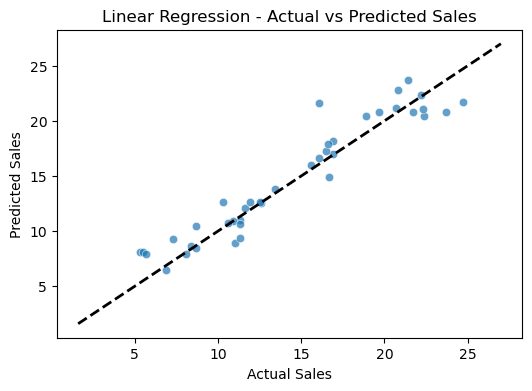

In [43]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.title('Linear Regression - Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [44]:
# Decision Tree Regressor Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.2f}")

Mean Squared Error: 3.40
R2 Score: 0.89


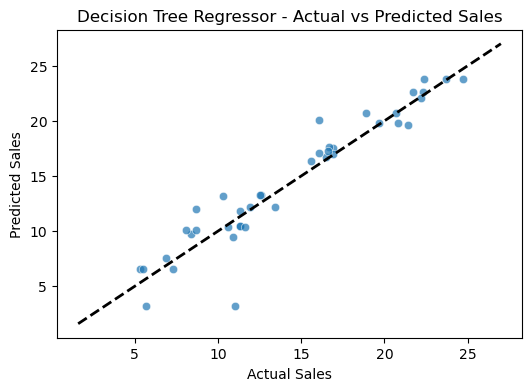

In [45]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.7)
plt.title('Decision Tree Regressor - Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [46]:
# Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Mean Squared Error: 1.44
R2 Score: 0.95


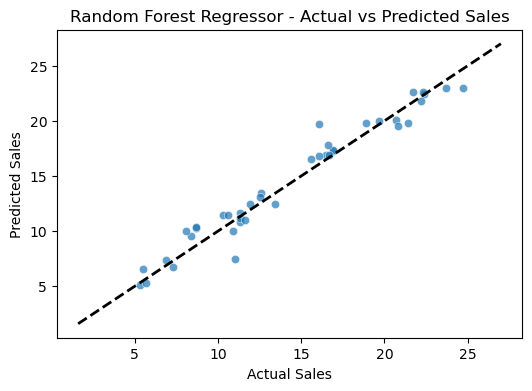

In [47]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.title('Random Forest Regressor - Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [48]:
# Data for prediction using Linear Regression
print("\nPredict Sales using Linear Regression")
tv = float(input("Enter TV advertising budget: "))
radio = float(input("Enter Radio advertising budget: "))
newspaper = float(input("Enter Newspaper advertising budget: "))
prediction_lr = lr.predict([[tv, radio, newspaper]])
print(f"Predicted Sales: {prediction_lr[0]:.2f}")



Predict Sales using Linear Regression
Enter TV advertising budget: 24
Enter Radio advertising budget: 56
Enter Newspaper advertising budget: 34
Predicted Sales: 11.82


In [49]:
# Data for prediction using Decision Tree Regressor
print("\nPredict Sales using Decision Tree Regressor")
tv = float(input("Enter TV advertising budget: "))
radio = float(input("Enter Radio advertising budget: "))
newspaper = float(input("Enter Newspaper advertising budget: "))
prediction_dt = dt.predict([[tv, radio, newspaper]])
print(f"Predicted Sales: {prediction_dt[0]:.2f}")


Predict Sales using Decision Tree Regressor
Enter TV advertising budget: 76
Enter Radio advertising budget: 555
Enter Newspaper advertising budget: 764
Predicted Sales: 14.70


In [50]:
# Data for prediction using Random Forest Regressor
print("\nPredict Sales using Random Forest Regressor")
tv = float(input("Enter TV advertising budget: "))
radio = float(input("Enter Radio advertising budget: "))
newspaper = float(input("Enter Newspaper advertising budget: "))
prediction_rf = rf.predict([[tv, radio, newspaper]])
print(f"Predicted Sales: {prediction_rf[0]:.2f}")


Predict Sales using Random Forest Regressor
Enter TV advertising budget: 234
Enter Radio advertising budget: 4543
Enter Newspaper advertising budget: 5653
Predicted Sales: 23.56
